In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rc = {
    "font.family": "Latin modern",
    "font.size": 10,
    "axes.axisbelow": True,
    "grid.linestyle": '--',
    "axes.grid": True,
    "mathtext.fontset": "cm",
    "grid.alpha": 0.3,
    "text.usetex": True
}

# plt.rcParams.keys
plt.rcParams.update(rc)



In [2]:
from q_factor import get_q_df
q_values = get_q_df('./data_in/QVALUES.txt')

q_values['Q'] = q_values['Q'] * 1

q_values


,i_ref,Q
0,0.0,22.709
1,0.1,27.925
2,0.2,32.978
3,0.3,38.767
4,0.4,46.492
5,0.5,56.466
6,0.6,68.512
7,0.7,84.725
8,0.8,115.720
9,0.9,164.860


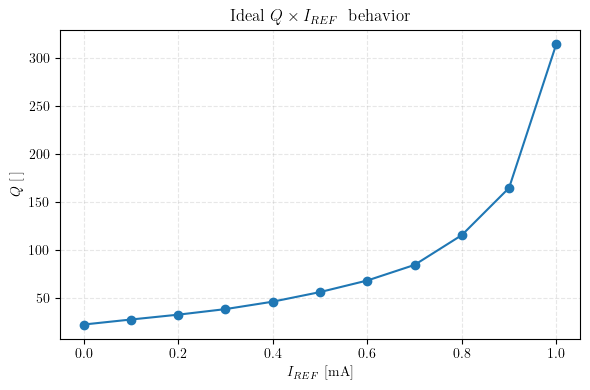

In [3]:
f, ax = plt.subplots(figsize=(6,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'Ideal $Q \times I_{REF}\;$ behavior'
)

f.tight_layout()

f.savefig('./fig/q-no-drop.pdf')

In [4]:
q_values = get_q_df('./data_in/QVALUES.txt', include_q_drop=False, drop_at=0.8)

q_values['Q'] = q_values['Q'] * 1

q_values


,i_ref,Q
0,0.0,22.709
1,0.1,27.925
2,0.2,32.978
3,0.3,38.767
4,0.4,46.492
5,0.5,56.466
6,0.6,68.512
7,0.7,84.725
8,0.8,115.720
9,0.9,164.860


In [5]:
q_values_d = get_q_df('./data_in/QVALUES.txt', include_q_drop=True, drop_at=0.9)

# q_values['Q'] = q_values['Q'] * 1

q_values_d


,i_ref,Q
0,0.0,22.709
1,0.1,27.925
2,0.2,32.978
3,0.3,38.767
4,0.4,46.492
5,0.5,56.466
6,0.6,68.512
7,0.7,84.725
8,0.8,115.720
9,0.9,20.000


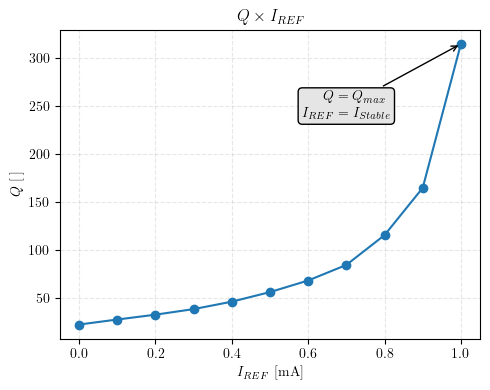

In [6]:
f, ax = plt.subplots(figsize=(5,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'$Q \times I_{REF}\;$'
)

ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
                  xy=(1.0, q_values['Q'].max()), xycoords="data",
                  xytext=(0.7, 250),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="#E5E5E5"),
                  arrowprops=dict(arrowstyle="->"))

f.tight_layout()
f.savefig('./fig/q-iref-q_max-i_stable.pdf')

In [7]:
inst_run = pd.read_csv('./results.txt')
inst_run = inst_run.iloc[:, :-1].astype(int)

inst_run.columns = ['Time', 'I_REF', 'Q_m']
inst_run['I_REF [mA]'] = inst_run['I_REF'] / 1024

inst_run

,Time,I_REF,Q_m,I_REF [mA]
0,2,1013,23,0.989258
1,3,1013,23,0.989258
2,4,1003,23,0.979492
3,5,1003,23,0.979492
4,6,993,23,0.969727
5,7,993,23,0.969727
6,8,983,23,0.959961
7,9,983,23,0.959961
8,10,973,23,0.950195
9,11,973,23,0.950195


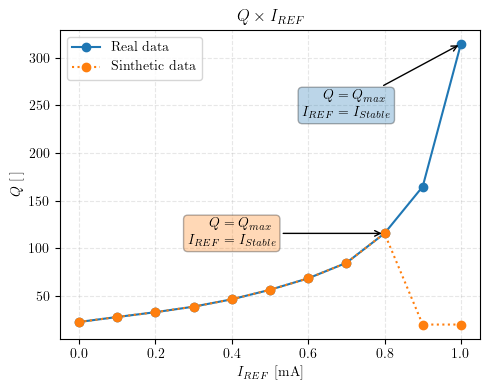

In [8]:
f, ax = plt.subplots(figsize=(5,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o', label='Real data', c='C0')
ax.plot(q_values_d['i_ref'], q_values_d['Q'], ':o', label='Sinthetic data', c='C1')
# ax.plot(inst_run['I_REF [mA]'], inst_run['Q_m'], ':o', label='Sinthetic dataaaa', c='C1')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'$Q \times I_{REF}\;$'
)

ax.legend()

ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
                  xy=(1.0, q_values['Q'].max()), xycoords="data",
                  xytext=(0.7, 250),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="C0", alpha=0.3),
                  arrowprops=dict(arrowstyle="->"))


ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
                  xy=(0.8, q_values_d['Q'].max()), xycoords="data",
                  xytext=(0.4,  q_values_d['Q'].max()),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="C1", alpha=0.3),
                  arrowprops=dict(arrowstyle="->"))

f.tight_layout()
f.savefig('./fig/q-iref-instability-test.pdf')

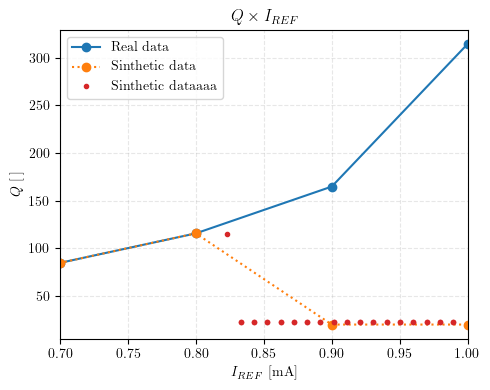

In [9]:
f, ax = plt.subplots(figsize=(5,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o', label='Real data', c='C0')
ax.plot(q_values_d['i_ref'], q_values_d['Q'], ':o', label='Sinthetic data', c='C1')
ax.plot(inst_run['I_REF [mA]'], inst_run['Q_m'], '.', label='Sinthetic dataaaa', c='C3')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'$Q \times I_{REF}\;$',
  xlim=[0.7, 1.0]
)

ax.legend()

# ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
#                   xy=(1.0, q_values['Q'].max()), xycoords="data",
#                   xytext=(0.7, 250),
#                   va="center", ha="center",
#                   bbox=dict(boxstyle="round", fc="C0", alpha=0.3),
#                   arrowprops=dict(arrowstyle="->"))


# ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
#                   xy=(0.8, q_values_d['Q'].max()), xycoords="data",
#                   xytext=(0.4,  q_values_d['Q'].max()),
#                   va="center", ha="center",
#                   bbox=dict(boxstyle="round", fc="C1", alpha=0.3),
#                   arrowprops=dict(arrowstyle="->"))

f.tight_layout()
# f.savefig('./fig/q-iref-instability-test-run.pdf')

In [10]:
# inst_run.iloc[0::5, :].to_latex('./tabs/instability-run.tex', index=False)
inst_run

,Time,I_REF,Q_m,I_REF [mA]
0,2,1013,23,0.989258
1,3,1013,23,0.989258
2,4,1003,23,0.979492
3,5,1003,23,0.979492
4,6,993,23,0.969727
5,7,993,23,0.969727
6,8,983,23,0.959961
7,9,983,23,0.959961
8,10,973,23,0.950195
9,11,973,23,0.950195


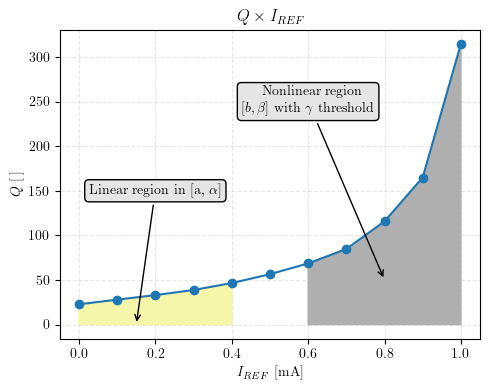

In [11]:
f, ax = plt.subplots(figsize=(5,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o')

a_alpha = q_values[q_values['i_ref'] < 0.5]
b_beta = q_values[q_values['i_ref'] > 0.5]

ax.fill_between(a_alpha['i_ref'], a_alpha['Q'], color='#F6F6AA', hatch='....')
ax.fill_between(b_beta['i_ref'], b_beta['Q'], color='#AFAFAF', hatch='.')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'$Q \times I_{REF}\;$'
)

ax.annotate(r"Linear region in [a, $\alpha$]",
                  xy=(0.15, 0), xycoords="data",
                  xytext=(0.2, 150),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="#E5E5E5"),
                  arrowprops=dict(arrowstyle="->"))


ax.annotate(r"Nonlinear region \\ $[b, \beta]$ with $\gamma$ threshold",
                  xy=(0.8, 50), xycoords="data",
                  xytext=(0.6, 250),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="#E5E5E5"),
                  arrowprops=dict(arrowstyle="->"))


f.tight_layout()
f.savefig('./fig/q-iref-regions.pdf')

In [39]:
sec_low = pd.read_csv('./sec-low.txt', header=None)
sec_low = sec_low.iloc[:, [0,1]]
sec_low.columns = ['I_REF', 'Q_m']
sec_low = sec_low.iloc[0::4, :]
sec_low = sec_low.iloc[1:, :].astype(int)
sec_low[r'$I_{REF}$ [mA]'] = sec_low['I_REF'] / 1024
sec_low = sec_low.iloc[:, [0, 2, 1]]
# sec_low = 

cols_ltx = [r'$I_{REF}$ [bits]', r'$I_{REF}$ [mA]', '$Q_m$']


sec_low.to_latex('./tabs/sec-low.tex', index=False, column_format='ccc', header=cols_ltx, escape=False)

/tmp/ipykernel_24786/2794284491.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sec_low.to_latex('./tabs/sec-low.tex', index=False, column_format='ccc', header=cols_ltx, escape=False)


In [63]:
sec_high = pd.read_csv('./sec-high.txt', header=None)
sec_high = sec_high.iloc[:, [1,2]]
sec_high.columns = ['I_REF', 'Q_m']
sec_high = sec_high.iloc[0::3, :]
sec_high = sec_high.iloc[1:, :].astype(int)
sec_high[r'$I_{REF}$ [mA]'] = sec_high['I_REF'] / 1024
# sec_high = sec_high.reset_index().iloc[:, 1:].drop_duplicates()
sec_high = sec_high.iloc[:, [0, 2, 1]]
# # sec_low = 

cols_ltx = [r'$I_{REF}$ [bits]', r'$I_{REF}$ [mA]', '$Q_m$']


sec_high.to_latex('./tabs/sec-high.tex', index=False, column_format='ccc', header=cols_ltx, escape=False)

sec_high

/tmp/ipykernel_24786/3174239107.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sec_high.to_latex('./tabs/sec-high.tex', index=False, column_format='ccc', header=cols_ltx, escape=False)


,I_REF,$I_{REF}$ [mA],Q_m
3,1022,0.998047,22
6,826,0.806641,119
9,826,0.806641,119
12,1022,0.998047,314
15,794,0.775391,106
18,794,0.775391,106
21,794,0.775391,106
24,694,0.677734,80
27,694,0.677734,80
30,694,0.677734,80


In [64]:
sec_high.shape

(33, 3)